Load in an AIA Temperature Response, created in IDL, and then plot it

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.io as io

import warnings
warnings.simplefilter('ignore')

In [2]:
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['mathtext.default']="regular"

In [3]:
# From IDL   
# tresp=aia_get_response(/temperature,/dn,/chianti,/noblend,/evenorm,timedepend_date='19-Feb-16 21:00')
# Then just save out everything but A304
tr=io.readsav('feb16aia_resp.dat')
# Get rid of the b in the string name (byte vs utf stuff....)
print(tr['channels'])
for i in np.arange(len(tr['channels'])):
    tr['channels'][i]=tr['channels'][i].decode("utf-8")
print(tr['channels'])

# Work out the Fe18 response
tr18=tr['tr'][0]-tr['tr'][2]/120. -tr['tr'][4]/450.
id_bad=[i for i, value in enumerate(tr['logt']) if value < 6.35]
tr18[id_bad]=0

# setup AIA colours
clrs=['darkgreen','darkcyan','gold','sienna','indianred','darkslateblue','cornflowerblue']

[b'A94' b'A131' b'A171' b'A193' b'A211' b'A335']
['A94' 'A131' 'A171' 'A193' 'A211' 'A335']


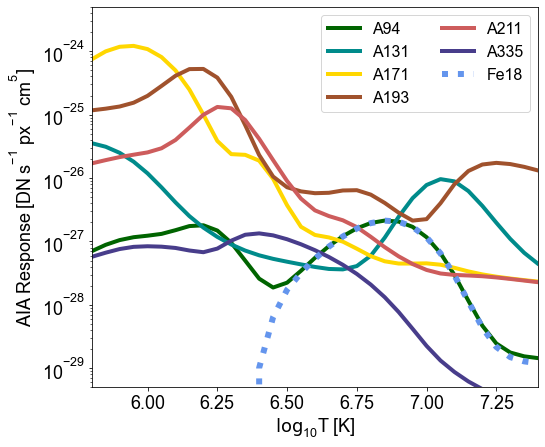

In [4]:
fig = plt.figure(figsize=(8, 7))
for i in np.arange(6):
    plt.semilogy(tr['logt'],tr['tr'][i],label=tr['channels'][i],color=clrs[i],lw=4)
plt.semilogy(tr['logt'],tr18,':',lw=6,label='Fe18',color=clrs[6])
plt.xlabel('$\log_{10}T\;[K]$')
plt.ylabel('$AIA\;Response\;[DN\;s^{-1}\;px^{-1}\;cm^5$]')
plt.ylim([5e-30,5e-24])
plt.xlim([5.8,7.4])
plt.legend(ncol=2,prop={'size': 16})
plt.show()

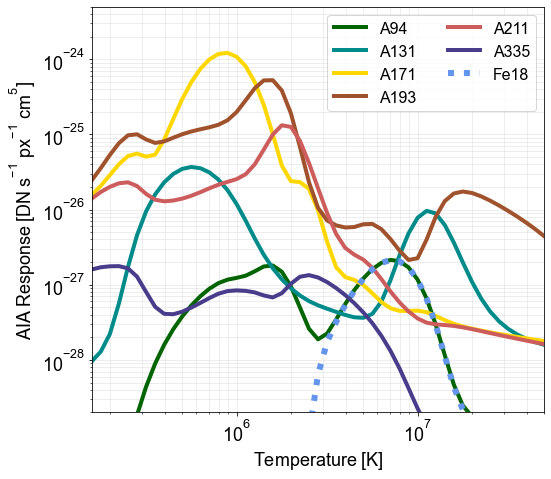

In [5]:
# Do a log-log version over a wider T range
fig = plt.figure(figsize=(8, 7))
for i in np.arange(6):
    plt.semilogy(10**tr['logt'],tr['tr'][i],label=tr['channels'][i],color=clrs[i],lw=4)
plt.loglog(10**tr['logt'],tr18,':',lw=6,label='Fe18',color=clrs[6])
plt.xlabel('$Temperature\;[K]$')
plt.ylabel('$AIA\;Response\;[DN\;s^{-1}\;px^{-1}\;cm^5$]')
plt.ylim([2e-29,5e-24])
plt.xlim([10**5.2,10**7.7])
plt.legend(ncol=2,prop={'size': 16})
plt.grid(True,which='both',lw=0.5,color='gainsboro')
plt.tight_layout(rect = [0, 0, 1, 1])
plt.savefig('feb16aia_resp.pdf',box_inches='tight')  
plt.show()
